In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

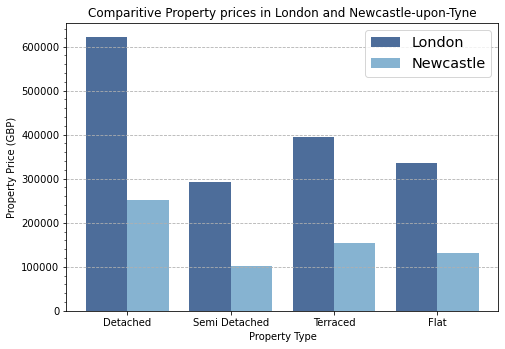

In [148]:
#importing data set, creating dataframe and dropping the 'Date' column as it is redundant for this plot
data = pd.read_csv("Property_Data/Average-prices-Property-Type-2021-05_wrangled.csv")
df = pd.DataFrame(data)
df.drop(['Date'], axis=1, inplace=True)

#splitting the dataframe so each region has its own dataframe
dfLondon = df[df['Region_Name'] == 'London'].reset_index()
dfNewc = df[df['Region_Name'] == 'Newcastle upon Tyne'].reset_index()
dfNewc.drop(['Region_Name','index'], axis=1, inplace=True)

#sorting the data to be used for the axes
x_axisN = dfNewc['propertyType'].unique()
y_axisN = dfNewc.groupby('propertyType').mean()['averagePrice']
x_axisL = dfLondon['propertyType'].unique()
y_axisL = dfLondon.groupby('propertyType').mean()['averagePrice']

#plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#pL = ax.bar(x=x_axisL, height=y_axisL, width=-0.4, data=dfLondon, align='edge', label='London', color='#4d6d9a')
#pN = ax.bar(x=x_axisN, height=y_axisN, width=0.4, data=dfNewc, align='edge', label='Newcastle', color='#86b3d1')

plt.title('Comparitive Property prices in London and Newcastle-upon-Tyne')
plt.ylabel('Property Price (GBP)')
plt.xlabel('Property Type')
plt.grid(axis='y', linestyle='--')
ax.legend(fontsize='x-large')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Detached', 'Semi Detached', 'Terraced', 'Flat'])
plt.savefig('test.svg', bbox_inches='tight')



In [182]:
data = pd.read_csv("Broadband_Data/202006_fixed_laua_performance_wrangled.csv")
temp = pd.DataFrame(data)
dfSc = temp[["laua_name", "averageDown", "averageUpload"]]

dfStat = dfSc[['averageDown','averageUpload']]

x_axisSc = dfSc['averageDown']
y_axisSc = dfSc['averageUpload']

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#pB = ax.scatter(x=x_axisSc, y=y_axisSc, c=x_axis, cmap="cool", edgecolors='black')

def stats(df,i):
    ave= sum(df.iloc[:,i])/len(df)
    return ave

def best_fit(df):
    ave_x = stats(dfStat, 0)
    ave_y = stats(dfStat,1)
    m = (sum(dfStat.iloc[i,0] * (dfStat.iloc[i,1] - ave_y) for i in range(len(dfStat))))/(sum(dfStat.iloc[i,0] * (dfStat.iloc[i,0] - ave_x) for i in range(len(dfStat))))
    b = ave_y - m * ave_x
    
    return (m,b)
    
m,b = best_fit(dfStat)

#plt.plot(dfSc['averageDown'], m*dfSc['averageDown'] + b)


In [220]:
df = pd.read_csv("Financial_Data/ftse_data_wrangled.csv", index_col='date').loc['2008-07-01':'2009-01-01']
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])

x = range(0, len(df))
sma = df['Close'].rolling(7).mean()

std = df['Close'].rolling(7).std()
bollUp = sma + std * 2.0
bollDown = sma - std * 2.0
#fig, (ax,ax2) = plt.subplots(2, figsize=(30,20), gridspec_kw={'height_ratios': [4, 1]})

#draws the OHLC
#for i, val in df.iterrows():
#    color = '#2CA453'
#    if val['Open'] > val['Close']: color= '#F04730'
#    ax.plot([x[i], x[i]], [val['Low'], val['High']], color=color)
#    ax.plot([x[i], x[i]-0.1], [val['Open'], val['Open']], color=color)
#    ax.plot([x[i], x[i]+0.1], [val['Close'], val['Close']], color=color)

#date ticks and ax grid - ORGANISE
#ax.set_xticks(ticks=x[::3])
#ax.set_xticklabels(df.date.dt.date[::3], rotation=45)
#ax.set_xticks(x, minor=True)
#ax2.set_xticks(ticks=x[::3])
#ax2.set_xticklabels(df.date.dt.date[::3], rotation=45)
#ax2.set_xticks(x, minor=True)

#ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
#ax2.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)

#adding volume 
#ax2.bar(x, df['Volume'], color='lightgrey')
#get max volume 
#mx = int(df['Volume'].max()*1.1)
#define tick location, 0 to max in 4
#yticks_ax2 = range(0, mx+1, int(mx/4))
#making tick labels
#yticks_labels_ax2 = ['{:.2f} mi'.format(i/1000000) for i in yticks_ax2]
#ax2.yaxis.tick_left() #moves tick
#plot y ticks
#plt.yticks(yticks_ax2[1:-1], yticks_labels_ax2[1:-1])
#plt.ylim(0,mx)

#sma = df['Close'].rolling(7).mean()
#ax.plot(x, sma, color='blue')

#std = df['Close'].rolling(7).std()
#bollUp = sma + std * 2.0
#bollDown = sma - std * 2.0

#ax.plot(x , bollUp, linestyle="dashed", c="g")
#ax.plot(x , bollDown, linestyle="dashed", c="r")

#plt.subplots_adjust(wspace=0, hspace=0)
#plt.show()
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')

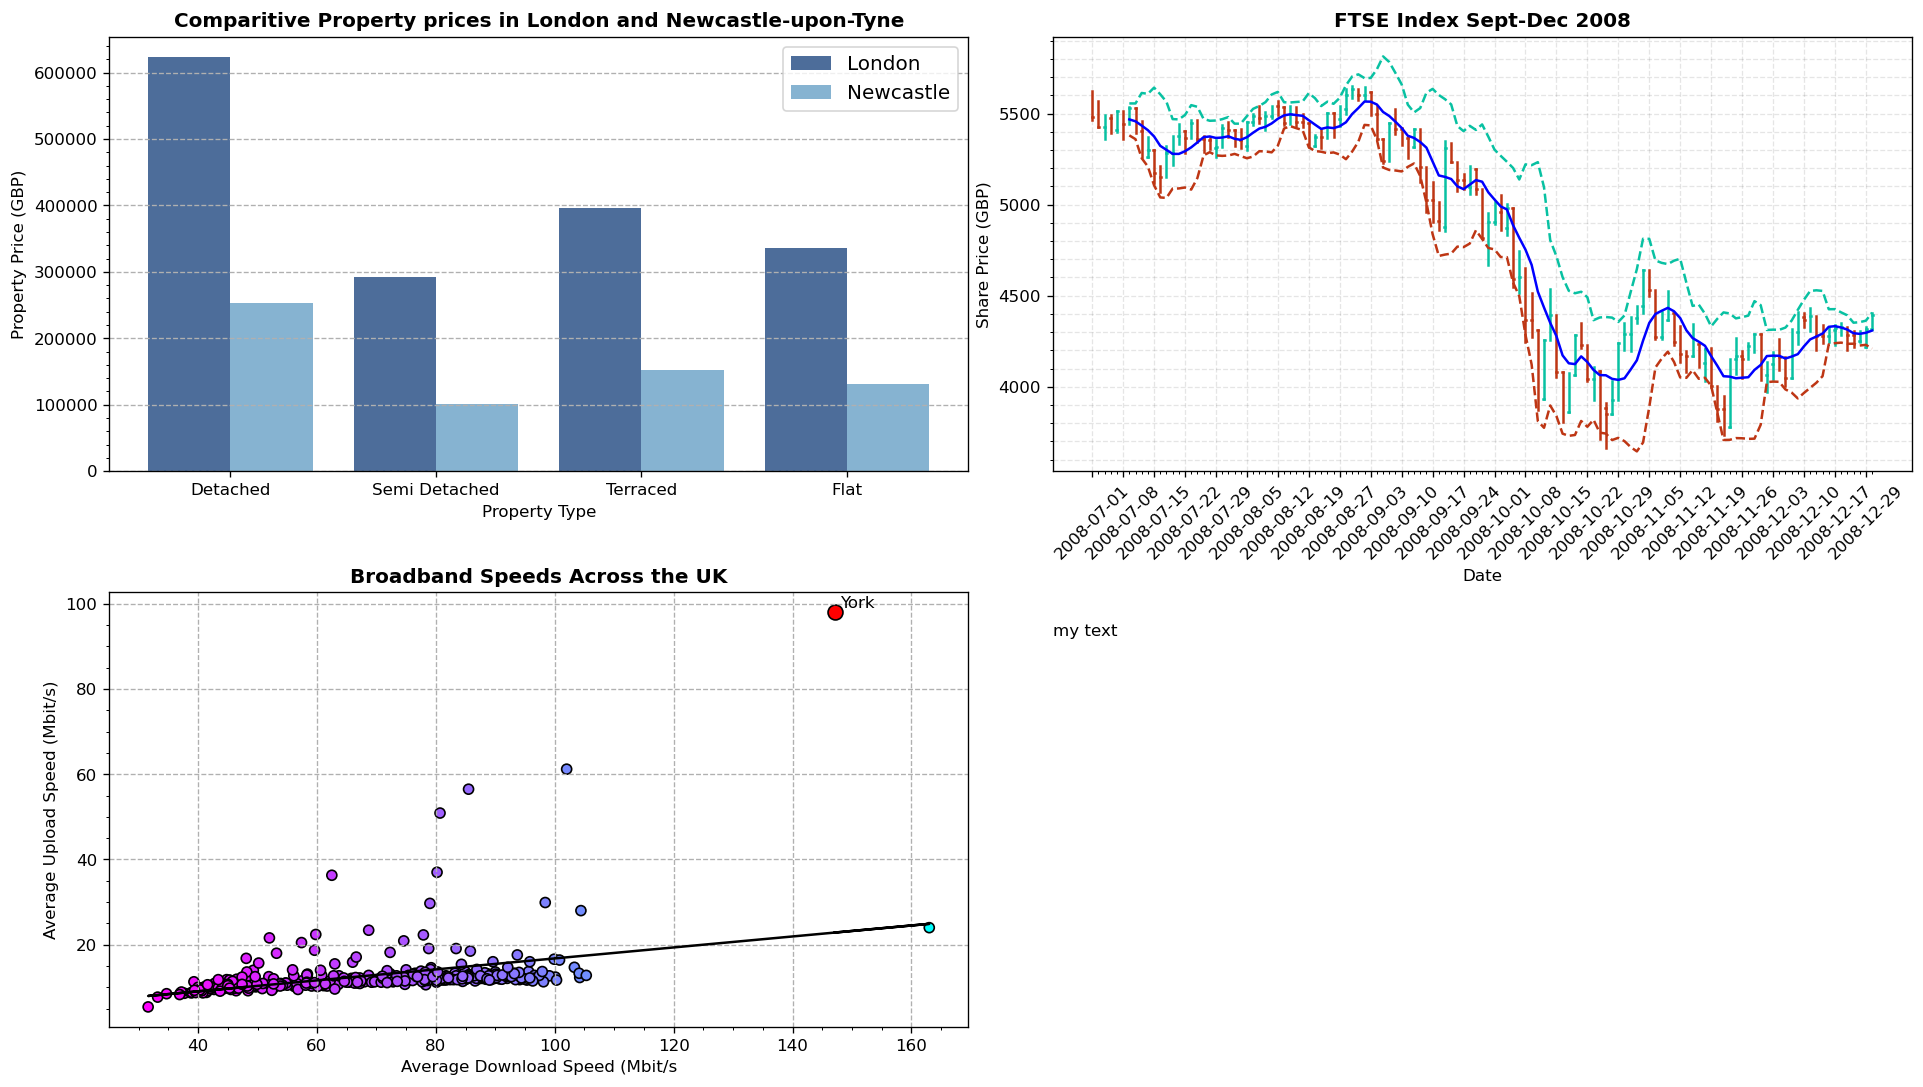

In [264]:
cm = 1/2.54 
fig, ax = plt.subplots(2,2, figsize=(16,9), dpi=120)

ax[0,0].bar(x=x_axisL, height=y_axisL, width=-0.4, data=dfLondon, align='edge', label='London', color='#4d6d9a')
ax[0,0].bar(x=x_axisN, height=y_axisN, width=0.4, data=dfNewc, align='edge', label='Newcastle', color='#86b3d1')
ax[0,0].set_title('Comparitive Property prices in London and Newcastle-upon-Tyne', fontweight='bold')
ax[0,0].set_ylabel('Property Price (GBP)')
ax[0,0].set_xlabel('Property Type')
ax[0,0].grid(axis='y', linestyle='--')
ax[0,0].legend(fontsize='large')
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].set_xticks([0,1,2,3])
ax[0,0].set_xticklabels(['Detached', 'Semi Detached', 'Terraced', 'Flat'])




ax[1,0].scatter(x=x_axisSc, y=y_axisSc, c=x_axisSc, cmap="cool_r", edgecolors='black')
ax[1,0].plot(dfSc['averageDown'], m*dfSc['averageDown'] + b, color='black')
ax[1,0].set_title('Broadband Speeds Across the UK', fontweight='bold')
ax[1,0].set_ylabel('Average Upload Speed (Mbit/s)')
ax[1,0].set_xlabel('Average Download Speed (Mbit/s')
ax[1,0].grid(linestyle='--')
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
## need to add annotation showing outlier (York) and correlation coefficient
#original x and y is 147.1 and 98.1
ax[1,0].text(148,99, 'York')
ax[1,0].scatter(147.1,98.1, color='red', s=80, edgecolors='black')


for i, val in df.iterrows():
    color = '#08c1a2'
    if val['Open'] > val['Close']: color= '#be3614'
    ax[0,1].plot([x[i], x[i]], [val['Low'], val['High']], color=color)
    ax[0,1].plot([x[i], x[i]-0.1], [val['Open'], val['Open']], color=color)
    ax[0,1].plot([x[i], x[i]+0.1], [val['Close'], val['Close']], color=color)
ax[0,1].set_title('FTSE Index Sept-Dec 2008', fontweight='bold')
ax[0,1].set_xticks(ticks=x[::5])
ax[0,1].set_xticklabels(df.date.dt.date[::5], rotation=45)
ax[0,1].set_xticks(x, minor=True)
ax[0,1].set_ylabel('Share Price (GBP)')
ax[0,1].set_xlabel('Date')
ax[0,1].grid(color='black', linestyle='dashed', which='major', alpha=0.1)
ax[0,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].yaxis.grid(color='black', linestyle='dashed', which='minor', alpha=0.1)

ax[0,1].plot(x, sma, color='blue')

ax[0,1].plot(x , bollUp, linestyle="dashed", c="#08c1a2")
ax[0,1].plot(x , bollDown, linestyle="dashed", c="#be3614")


ax[1, 1].set_axis_off()
ax[1, 1].text(0, 0.9, 'my text')


fig.tight_layout(pad=0.5)
plt.show()
